In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.console import ProgressBar
import logging
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import astropy.visualization
from fast_histogram import histogram1d

In [4]:
hdu_ffi = fits.open('/Users/obsidian/Downloads/kplr2015236_smallflat.fits')
campaign = 8
#hdu_counts = fits.open('/Volumes/burlingame/FFI_counts/C{}_FFI_mask.fits'.format(str(campaign)))
hdu_counts = fits.open('../data/FFI_counts/C8_FFI_mask.fits')

In [5]:
mod_out = 'MOD.OUT 9.1'
counts = hdu_counts[mod_out].data
data_raw = hdu_ffi[mod_out].data

In [7]:
data = data_raw

In [8]:
logdat = np.log10(data)

In [24]:
minmax = astropy.visualization.MinMaxInterval()

vmin, vmax = minmax.get_limits(data)

x = np.linspace(vmin, vmax, 200)
y = histogram1d(data.reshape(-1), bins=200, range=(vmin, vmax))

In [30]:
good_interval = astropy.visualization.ManualInterval(0.98, 1.02)
vmin, vmax = good_interval.get_limits(data)

In [33]:
norm = astropy.visualization.ImageNormalize(vmin=vmin, vmax=vmax)

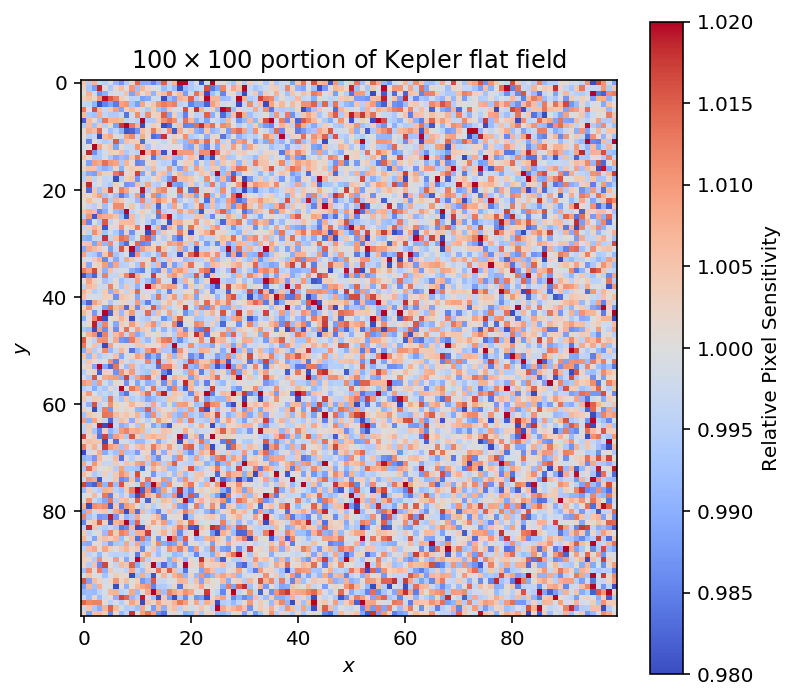

In [65]:
plt.figure(figsize=(6,6))

plt.imshow(data[200:300, 200:300], norm=norm, cmap='coolwarm')
plt.title(r'$100 \times 100$ portion of Kepler flat field')
cbar = plt.colorbar()
cbar.set_label('Relative Pixel Sensitivity')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('../figures/flat_field_100pix.png', dpi=300, bbox_inches='tight')

In [58]:
dmin, dmax = 0.95, 1.05
x = np.linspace(dmin, dmax, 200)
y = histogram1d(data[200:300, 200:300].reshape(-1), bins=200, range=(dmin, dmax))

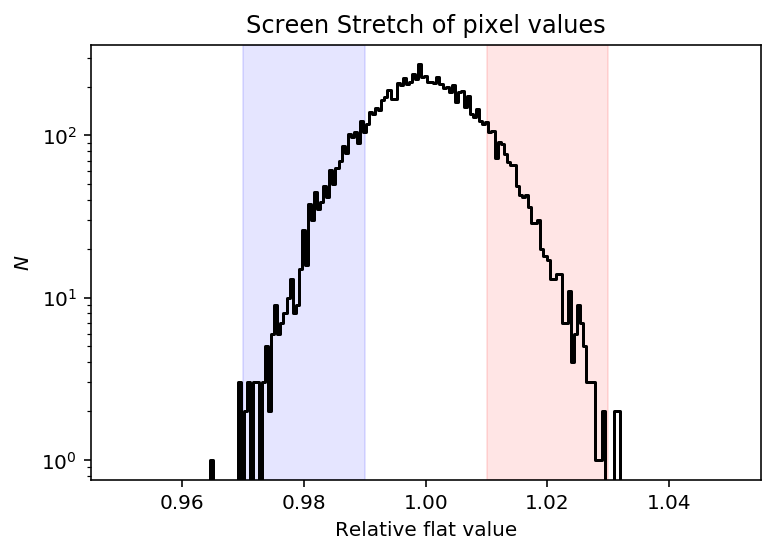

In [64]:
plt.step(x, y, 'k')
plt.axvspan(1.01, 1.03, alpha=0.1, color='r')
plt.axvspan(0.97, 0.99, alpha=0.1, color='b')
plt.yscale('log')
plt.xlabel('Relative flat value')
plt.ylabel('$N$')
plt.title('Screen Stretch of pixel values');